In [37]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="D90rVo7ahGyBHqpqtBIH")
project = rf.workspace("indian-institute-of-information-technology-sricity").project("guava-h98xp")
dataset = project.version(6).download("tensorflow")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to guava-6 in tensorflow:: 100%|██████████| 505/505 [00:00<00:00, 4372.43it/s]


In [38]:
!pip install tensorflow
import tensorflow as tf

In [39]:
import numpy as np
import pandas as pd
import os
import cv2
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score
# import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.preprocessing import FunctionTransformer,LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [40]:
def load_data(dir , df):
    # Load images and labels into arrays
    images = []
    labels = []

    for index, row in df.iterrows():
        image_file_path = os.path.join(dir, row['filename'])
        image = cv2.imread(image_file_path)
        if image is not None:
            resized_image = cv2.resize(image, (img_size, img_size))  # Resize to a fixed size
            resized_image = np.array(resized_image) / 255.0
        images.append(resized_image)
        labels.append(row['target'])

    # Convert lists to numpy arrays
    return np.array(images) , np.array(labels)

In [41]:
img_size = 350

In [42]:
dir = "/kaggle/working/guava-6/train"
df = pd.read_csv(dir + "/_annotations.csv")
label_encoder = LabelEncoder()
# Encode the 'class' column
df['target'] = label_encoder.fit_transform(df['class'])

train_data, train_labels = load_data(dir , df)

print("Loaded data shape:", train_data.shape)
print("Loaded labels shape:", train_labels.shape)


Loaded data shape: (430, 350, 350, 3)
Loaded labels shape: (430,)


In [43]:
dir = "/kaggle/working/guava-6/test"
df = pd.read_csv(dir + "/_annotations.csv")
label_encoder = LabelEncoder()
# Encode the 'class' column
df['target'] = label_encoder.fit_transform(df['class'])

test_data, test_labels = load_data(dir , df)

print("Loaded data shape:", test_data.shape)
print("Loaded labels shape:", test_labels.shape)

Loaded data shape: (26, 350, 350, 3)
Loaded labels shape: (26,)


In [44]:
dir = "/kaggle/working/guava-6/valid"
df = pd.read_csv(dir + "/_annotations.csv")
label_encoder = LabelEncoder()
# Encode the 'class' column
df['target'] = label_encoder.fit_transform(df['class'])

valid_data, valid_labels = load_data(dir , df)

print("Loaded data shape:", valid_data.shape)
print("Loaded labels shape:", valid_labels.shape)

Loaded data shape: (42, 350, 350, 3)
Loaded labels shape: (42,)


Resnet 50


In [45]:
# Encode train_labels, valid_labels, and test_labels using one-hot encoding
train_labels_encoded = to_categorical(train_labels)
valid_labels_encoded = to_categorical(valid_labels)
test_labels_encoded = to_categorical(test_labels)

Training VGG16...
Epoch 1/10
54/54 [==============================] - 10s 175ms/step - loss: 59.5412 - accuracy: 0.4558 - val_loss: 0.6940 - val_accuracy: 0.3810
Epoch 2/10
54/54 [==============================] - 9s 162ms/step - loss: 23.1329 - accuracy: 0.5093 - val_loss: 0.6926 - val_accuracy: 0.6190
Epoch 3/10
54/54 [==============================] - 9s 162ms/step - loss: 0.7771 - accuracy: 0.4907 - val_loss: 10.2233 - val_accuracy: 0.6190
Epoch 4/10
54/54 [==============================] - 9s 162ms/step - loss: 54.6234 - accuracy: 0.5163 - val_loss: 0.6897 - val_accuracy: 0.6190
Epoch 5/10
54/54 [==============================] - 9s 163ms/step - loss: 0.6928 - accuracy: 0.5186 - val_loss: 0.6889 - val_accuracy: 0.6190
Epoch 6/10
54/54 [==============================] - 9s 162ms/step - loss: 0.6929 - accuracy: 0.5186 - val_loss: 0.6873 - val_accuracy: 0.6190
Epoch 7/10
54/54 [==============================] - 9s 162ms/step - loss: 0.6928 - accuracy: 0.5186 - val_loss: 0.6876 - val_

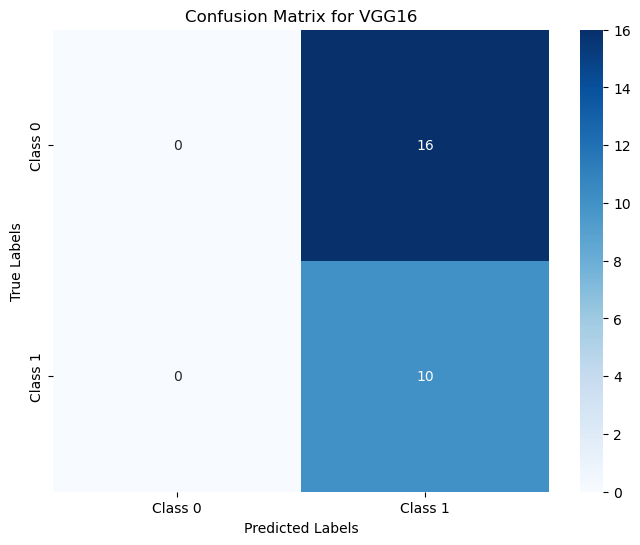

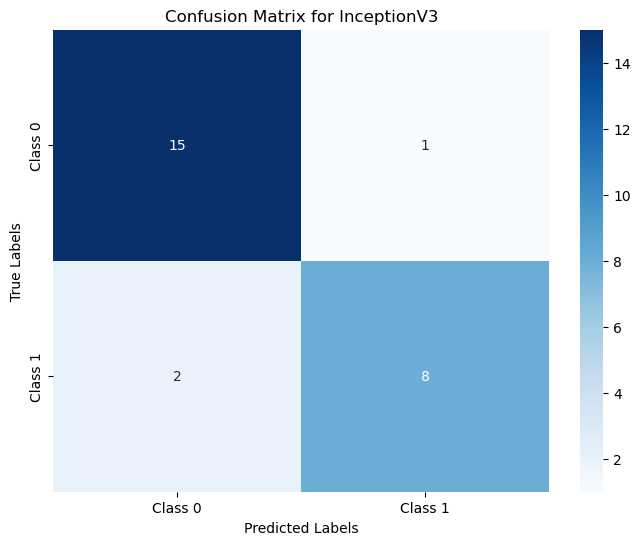

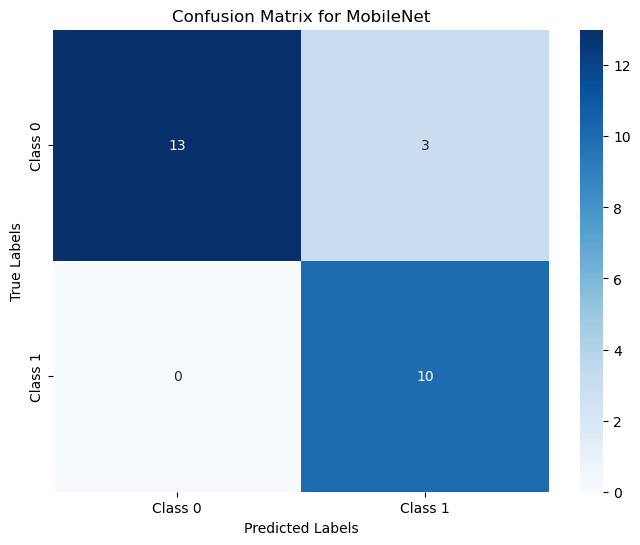

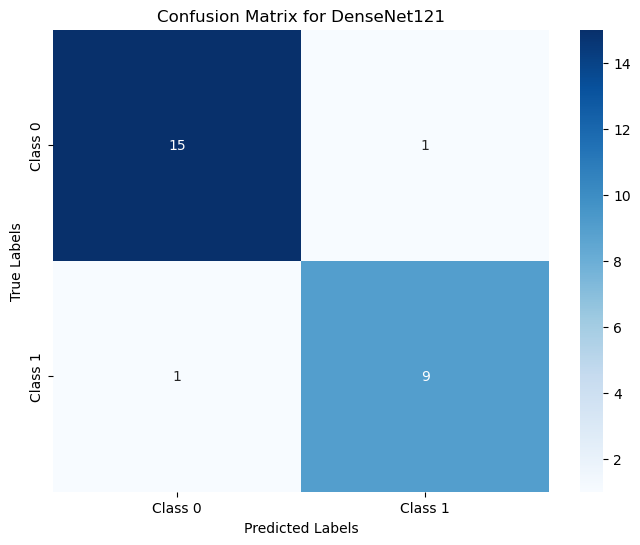

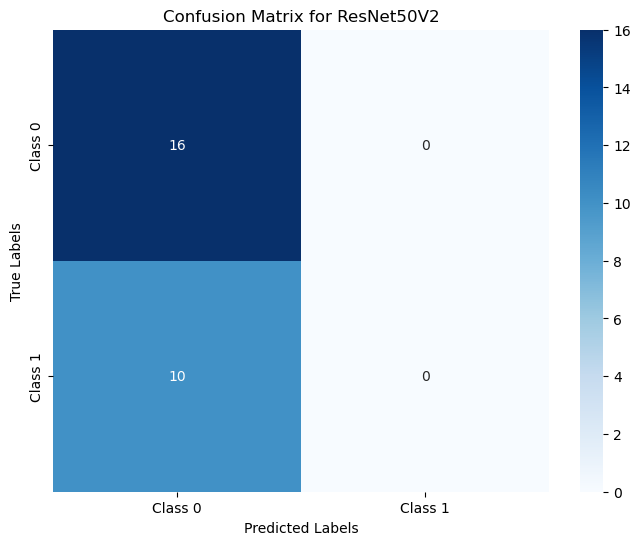

In [46]:
import pandas as pd
from keras.applications import VGG16, InceptionV3, MobileNet, DenseNet121, ResNet50V2
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create and compile the CNN model
def create_and_compile_model_CNN(img_size, num_classes, base_model):
    base_model = base_model(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
    
    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=output)
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a directory to save models
if not os.path.exists('./models'):
    os.makedirs('./models')

models = {
    "VGG16": VGG16,
    "InceptionV3": InceptionV3,
    "MobileNet": MobileNet,
    "DenseNet121": DenseNet121,
    "ResNet50V2": ResNet50V2
}

num_classes = 2
batch_size = 8
epochs = 10
img_size = 350
results = []

# Data loading and preprocessing should be done here (train_data, train_labels_encoded, valid_data, valid_labels_encoded, test_data, test_labels).

for model_name, base_model in models.items():
    print(f"Training {model_name}...")
    model = create_and_compile_model_CNN(img_size, num_classes, base_model)
    model.fit(train_data, train_labels_encoded, batch_size=batch_size, epochs=epochs, validation_data=(valid_data, valid_labels_encoded))
    
    # Save the model
    model.save(f'./models/{model_name}_model.h5')
    
    predictions = model.predict(test_data)
    predicted_labels = np.argmax(predictions, axis=1)
    
    accuracy = accuracy_score(test_labels, predicted_labels)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    # Generate and save confusion matrix
    cm = confusion_matrix(test_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.savefig(f'./models/{model_name}_confusion_matrix.png')
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Predicted Labels": predicted_labels.tolist()
    })

df = pd.DataFrame(results)
# print(df)
df.to_csv("model_results.csv", index=False)

In [47]:
df

,Model,Accuracy,Predicted Labels
0,VGG16,0.384615,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,InceptionV3,0.884615,"[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, ..."
2,MobileNet,0.884615,"[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, ..."
3,DenseNet121,0.923077,"[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, ..."
4,ResNet50V2,0.615385,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
